# Data Scientist Associate Practical Exam

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
df = pd.read_csv('data/moped.csv')

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [2]:
# Data Validation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [3]:
df.nunique()

Used it for          2
Owned for            3
Model Name          38
Visual Appeal        5
Reliability          5
Extra Features       5
Comfort              5
Maintenance cost     5
Value for Money      5
dtype: int64

## Combining values in row 'Owned for' as per criterion

In [4]:
df['Owned for'] = df['Owned for'].replace({ '<= 6 months':'Owned', '> 6 months':'Owned'})

## Replacing the missing values with zeros.
Since the only rows having missing values have same criteria to fill '0' as replacement, we replace all rows at same time.

In [5]:
df.fillna(0,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    713 non-null    float64
 6   Comfort           713 non-null    float64
 7   Maintenance cost  713 non-null    float64
 8   Value for Money   713 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


## Data Validation
 

There are **713 rows and 9 columns** and 4 rows have missing values before cleaning. After data validation:
* Used it for : No missing values and 2 unique values.
* Owned for : No missing values and 2 unique values after combining. 
* Model Name : Same as description without missing values.
* Visual Appeal : No missing values as per description.
* Reliability : Same as description without missing values.
* Extra Features : There are missing values, but replaced with '0' as per description.
* Comfort : There are missing values, but replaced with '0' as per description.           
* Maintenance cost : There are missing values, but replaced with '0' as per description.
* Value for Money : There are missing values, but replaced with '0' as per description.   

No rows are removed, so there are same number of rows and columns as before. 

[Text(0.5, 1.0, 'Plot 1, Distribution of Target variable')]

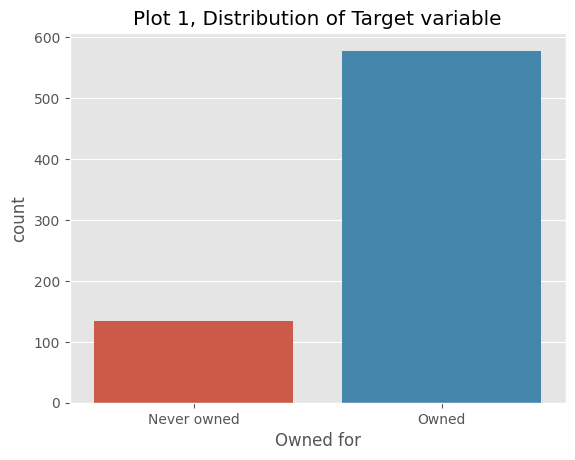

In [7]:
# Exploratory Analysis

style.use('ggplot')
sns.countplot(x='Owned for',data=df).set(title='Plot 1, Distribution of Target variable')

In [8]:
table_1 =pd.crosstab(df['Used it for'],df['Owned for'])
print(table_1)

Owned for    Never owned  Owned
Used it for                    
Commuting             81    472
Leisure               54    106


In [9]:
table_2 = pd.crosstab(df['Model Name'],df['Owned for'])
print(table_2)

Owned for                Never owned  Owned
Model Name                                 
Ampere Magnus EX                   2     23
Ampere Magnus Pro                  1     15
Ampere REO                         1     20
Ampere Zeal                        0      9
Ather 450X                         3     23
BGauss B8                          0      1
Bajaj Chetak                       4      9
Benling Aura                       2     17
Bounce Infinity E1                 2      8
Evolet Polo                        0      2
Gemopai Astrid Lite                0      3
Gemopai Ryder                      0      5
Hero Electric Atria                0      3
Hero Electric Flash               18     76
Hero Electric NYX                  1      7
Hero Electric Optima               7     68
Hero Electric Optima CX            0      9
Hero Electric Photon               4     30
Joy e-bike Monster                 0      2
Joy e-bike Wolf                    0      5
OLA S1                          

[Text(0.5, 1.0, 'Plot 3:Distribution of rating "Reliability"')]

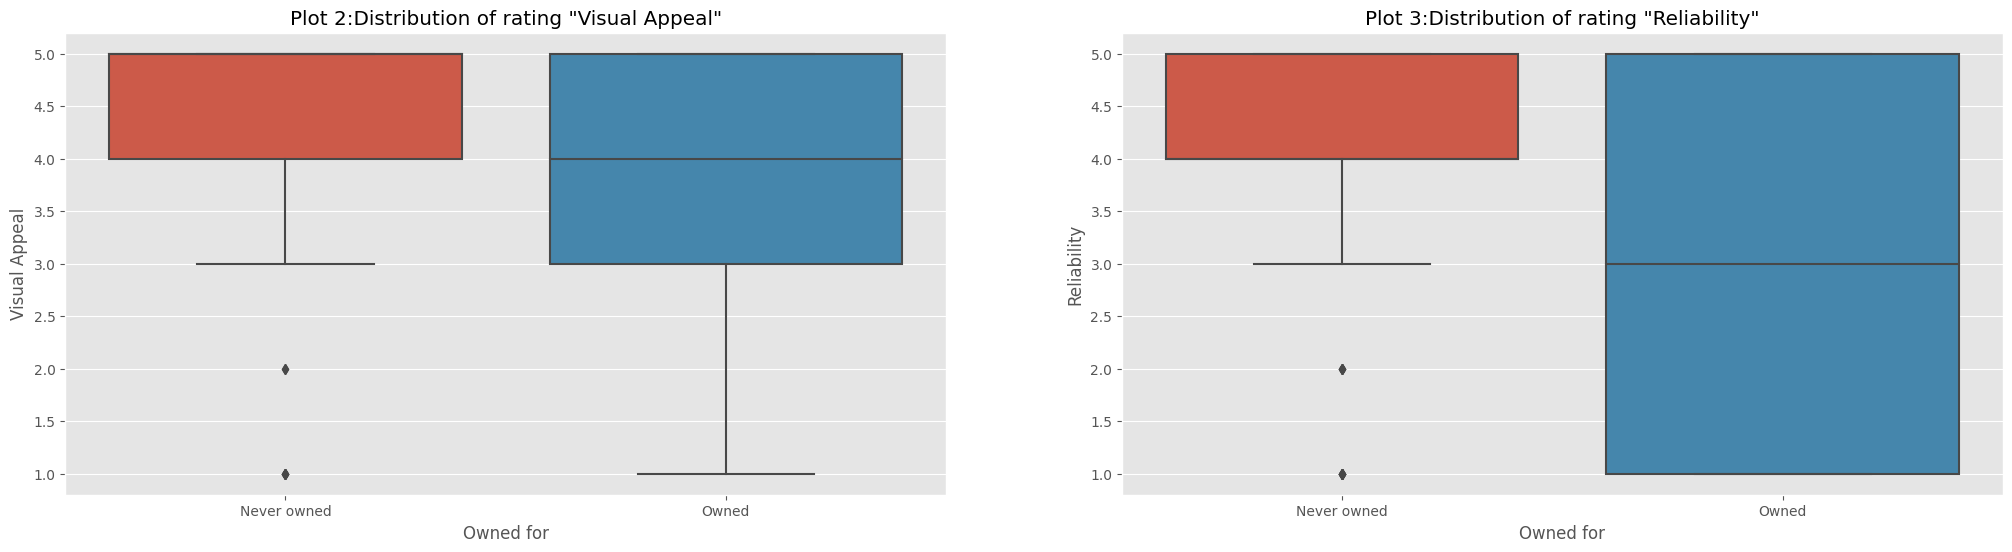

In [10]:
fig, axes = plt.subplots(1,2,figsize=(25,6))
sns.boxplot(x='Owned for',y='Visual Appeal',data=df,ax=axes[0]).set(title='Plot 2:Distribution of rating "Visual Appeal"')
sns.boxplot(x='Owned for',y='Reliability',data=df,ax=axes[1]).set(title='Plot 3:Distribution of rating "Reliability"')

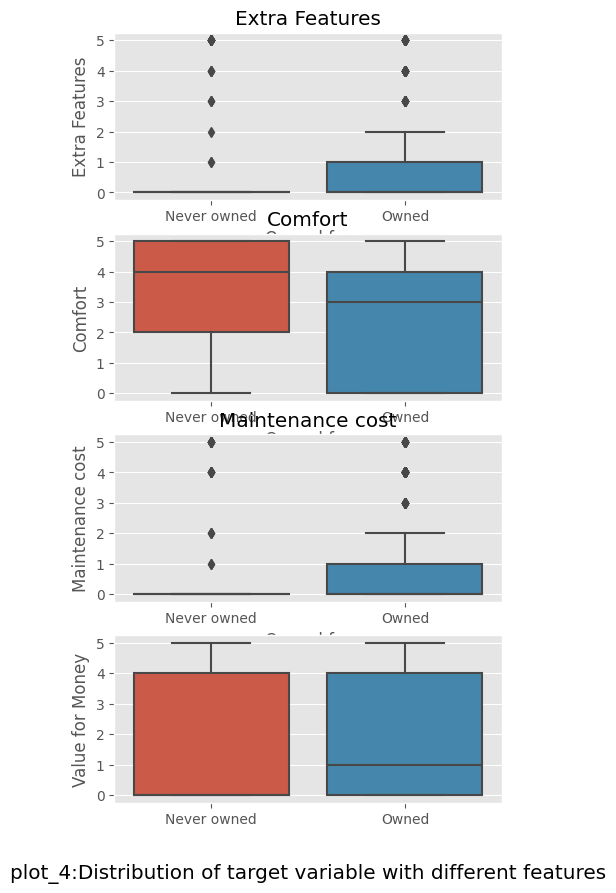

In [11]:
names = ['Extra Features', 'Comfort', 'Maintenance cost',
       'Value for Money']
f, axes = plt.subplots(4,1,figsize=(5,10))  
y = 0;
for name in names:
    sns.boxplot(x=df['Owned for'],y=df[name], ax=axes[y]).set(title=name)
    plt.xlabel(None)
    y = y + 1
plt.title('plot_4:Distribution of target variable with different features',x=0.5,y=-0.5)
plt.show()


## Exploratory Analysis


From the description of given scenerio, I consider the row **'Owned for'** to be **target variable**. From the plot 1, we can observe the distribution of values in the target variable. There are around **20% of fake owners** in the total data. To deal with imabalanced class issue I need to stratify target variable while splitting to train test splits. From table_1, I can observe that people who use their own moped for commuting are highest category. From table_2, i found an interesting insight. A distribution of target variable among different models, escpecially for the fake owners is zero in atleast 40% of models. This can highly effect the prediction. So I will drop this column from data during modelling.

From plots 2 and 3,I can observe that fake owners gave top ratings for **'Visual Appeal' and 'Reliabilty'** features. From this plots , I can conclude that these both features are important for prediction.

From plot 4, there are two features where the target variable is either 0 or 1 for almost all of the rows. I am dropping rows 'Extra Features ' and 'Maintenance cost'.

After data analysis the changes, the changes I am making for better predictions are
1. Converting the columns 'Used it for ' and target values 'Owned for' **from Categorical to binary**.
2. **Stratyfying** target value **for class imbalance**.
3. Dropping rows 'Model Name','Extra Features ' and 'Maintenance cost'.

In [12]:
df_final = df.drop(columns=['Model Name','Extra Features','Maintenance cost'])
df_final['Used it for'] = df_final['Used it for'].replace({'Commuting':1,'Leisure':0})
df_final['Owned for']=df_final['Owned for'].replace({'Never owned':1,'Owned':0})

In [13]:
features = df_final.drop(columns='Owned for')
target = df_final['Owned for']

## Model Fitting

1. Choosing if a reviewing person, have already own the moped or not is a **Classification Problem**.
2. I am choosing **Logistic Regression** as my base model, because **it is easy to train and easy to intrepret**.
3. and **Random Forest classifier** as my decision model, because it uses randomness for its prediction and **avoids overfitting**.

In [14]:
# importing models and metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,stratify=target)

## Base Model: LogisticRegression

In [16]:
base_log_reg = LogisticRegression()
base_log_reg.fit(X_train,y_train)
y_pred_base = base_log_reg.predict(X_test)

## Comparison Model: RandomForestClassifier

In [17]:
comp_rf = RandomForestClassifier()
comp_rf.fit(X_train,y_train)
y_pred_comp = comp_rf.predict(X_test)

## Model Evaluation

1. I am choosing **classification report for comparing my models**, because it shows all the important metrics for classification like accuracy, precision, recall in the same output.
2. **Accuracy** indicates how many values are predicted correctly as a percent of total values. **Precision** measures how good the model is at correctly identifying the positive class, in this case how many are fake owners.
3. From the evaluation, both model have comparable accuracies. But Linear Regression has higher accuracy and higher precision. So, **i will choose Linear Regression as my model** for further application for this problem.

## Evaluating Logistic Regression 

In [18]:
# Model Evaluation
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       173
           1       0.25      0.05      0.08        41

    accuracy                           0.79       214
   macro avg       0.53      0.51      0.48       214
weighted avg       0.70      0.79      0.73       214



## Evaluating Random forest classifier

In [19]:
print(classification_report(y_test,y_pred_comp))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       173
           1       0.39      0.17      0.24        41

    accuracy                           0.79       214
   macro avg       0.61      0.55      0.56       214
weighted avg       0.74      0.79      0.76       214



## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam